In [1]:
!nvidia-smi

Thu Jun 29 16:45:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.24       Driver Version: 528.24       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   49C    P0    16W /  50W |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\dioge\Documents\GitHub\tcc\newv


In [3]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.120  Python-3.11.2 torch-2.0.1+cpu CPU
Setup complete  (12 CPUs, 15.9 GB RAM, 391.2/410.8 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
model = YOLO(f'{HOME}/yolov8s.pt')

In [7]:
%cd {HOME}/datasets

c:\Users\dioge\Documents\GitHub\tcc\newv\datasets


In [8]:
from roboflow import Roboflow
rf = Roboflow(api_key="xw99J0UeRMBQjpG90ERB")
project = rf.workspace("tamaturgo").project("manaus_traffic")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.120, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Manaus_traffic-1 in yolov8:: 100%|██████████| 964/964 [00:00<00:00, 2563.86it/s]


In [10]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=250 imgsz=640 plots=True batch=16

c:\Users\dioge\Documents\GitHub\tcc


In [12]:
!dir {HOME}/runs/detect/train/

Formato de par�metro incorreto - "runs".


c:\Users\dioge\Documents\GitHub\tcc


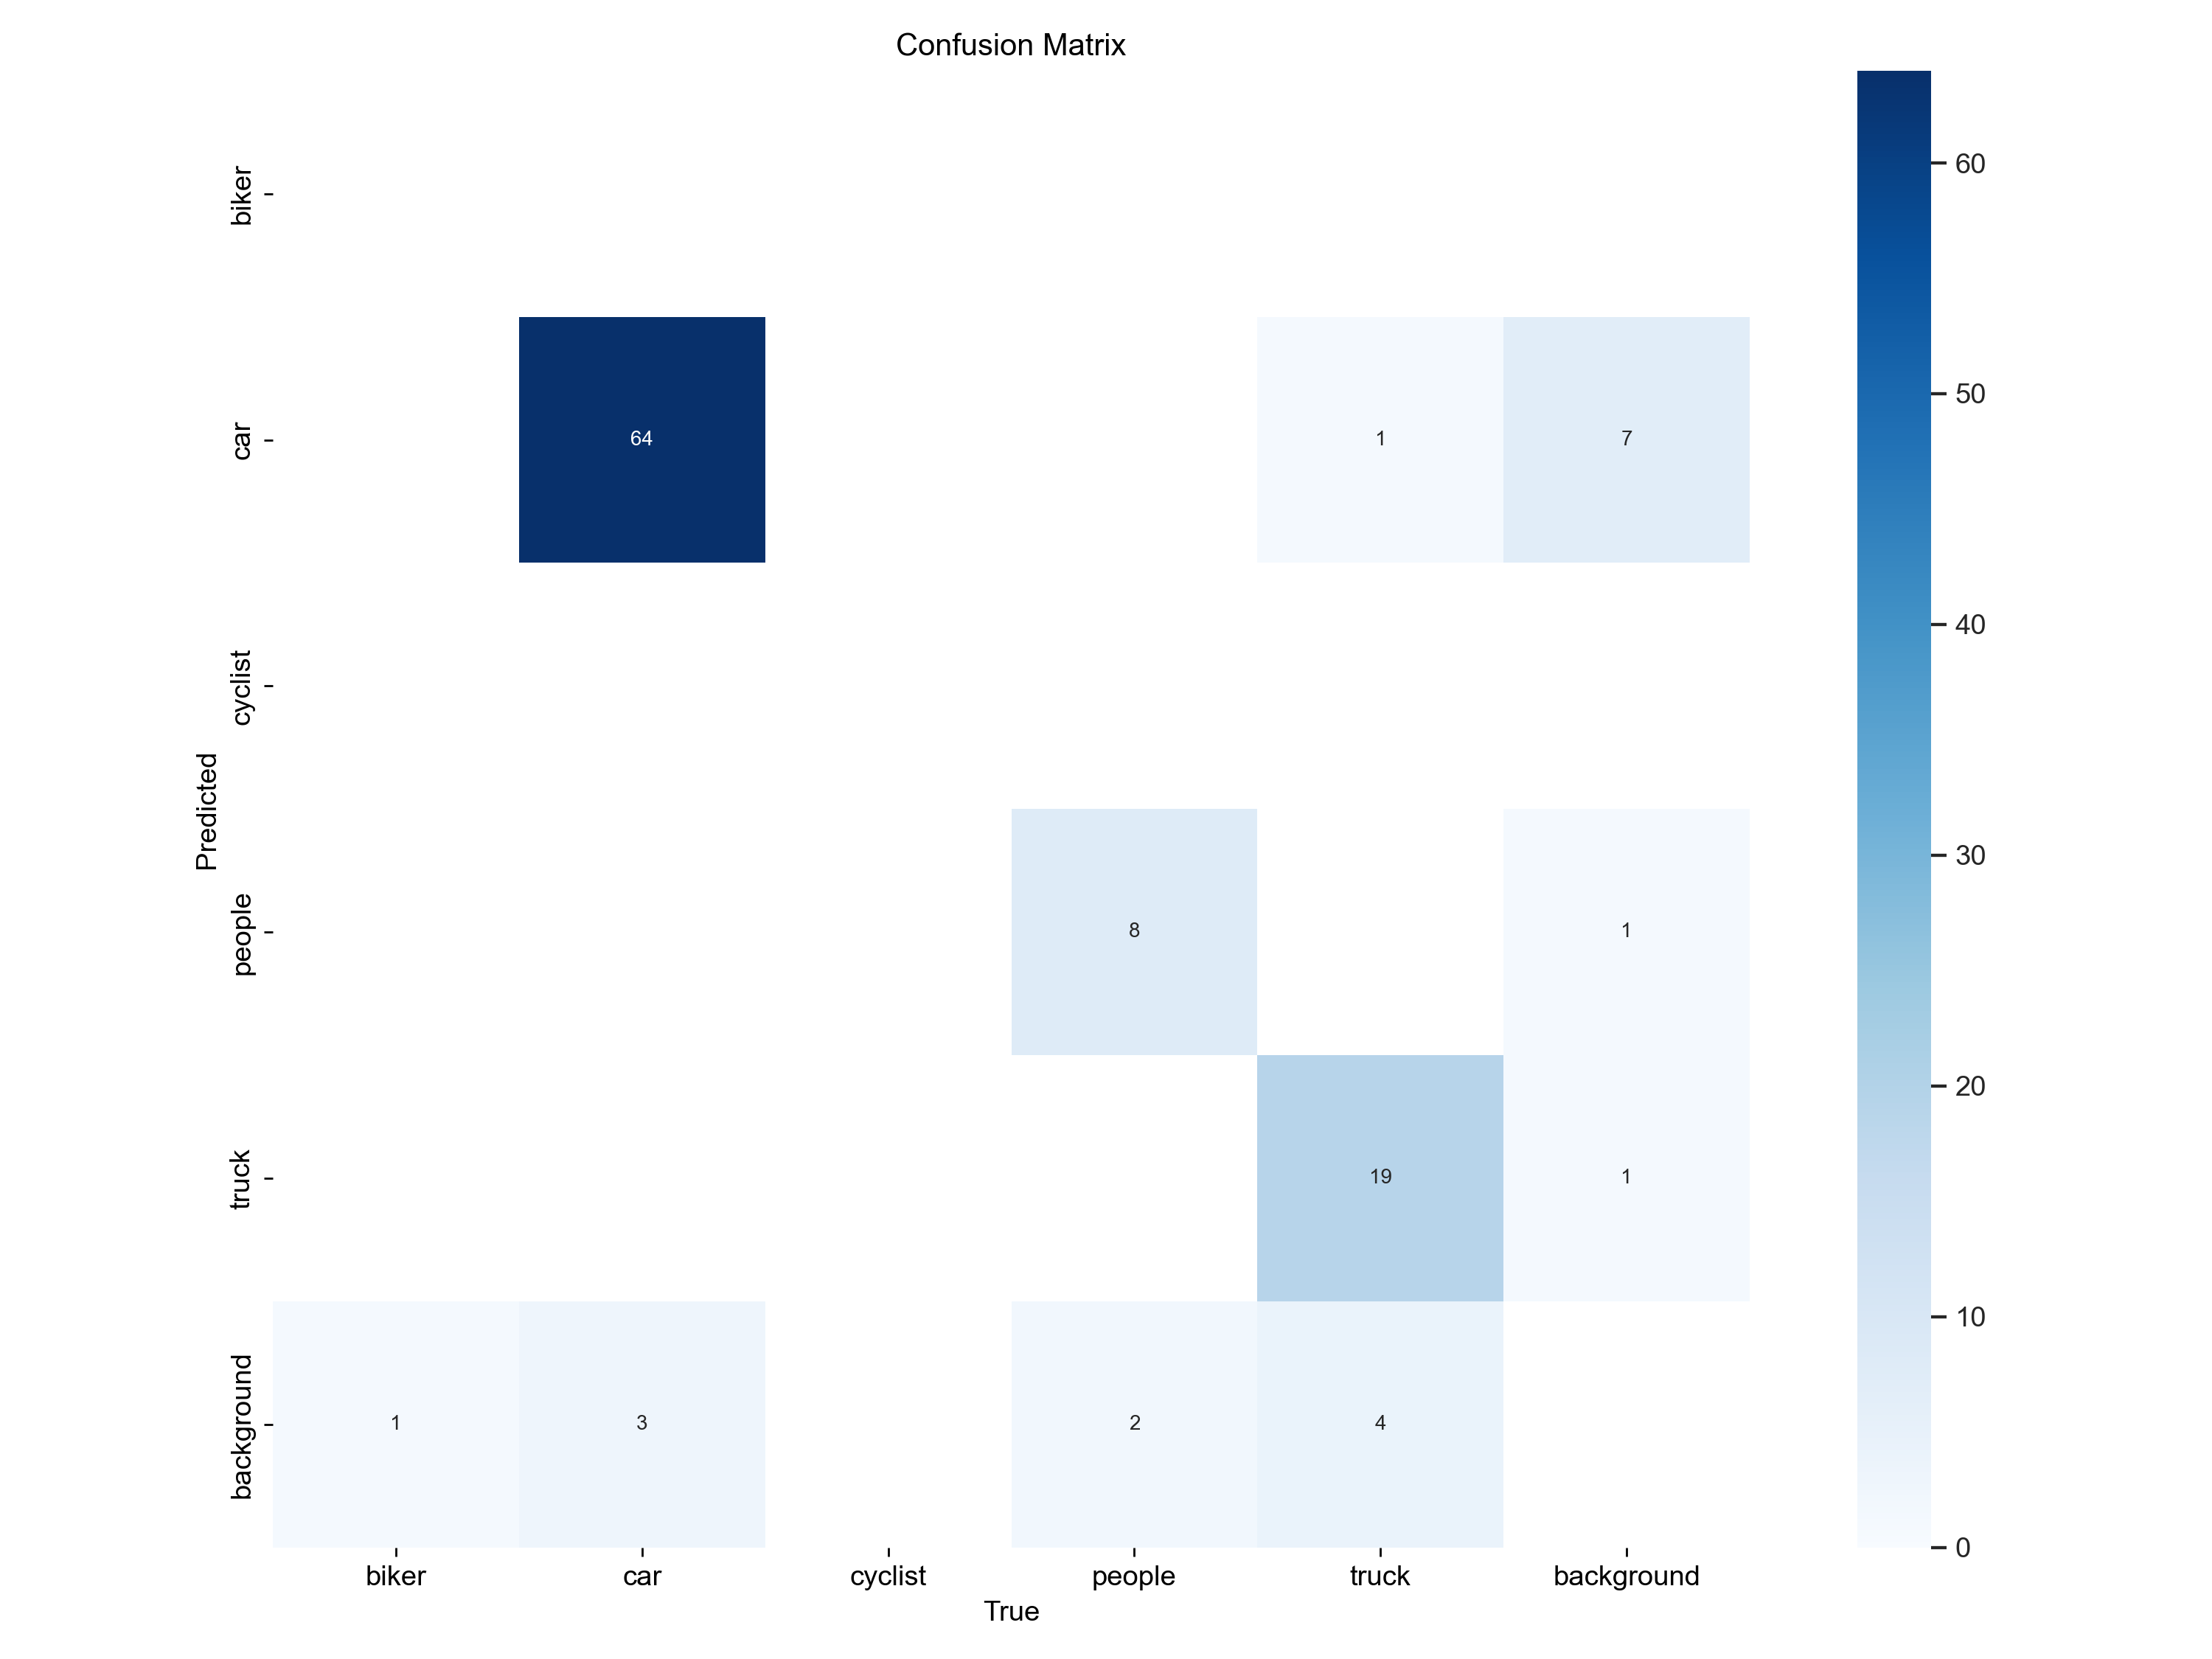

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [14]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

c:\Users\dioge\Documents\GitHub\tcc


C:\Users\dioge\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\dioge\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\dioge\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\dioge\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
Ultralytics YOLOv8.0.120  Python-3.11.2 torch-2.0.1+cpu CPU
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients

val: Scanning C:\Users\dioge\Documents\GitHub\tcc\datasets\carmodel2-2\valid\labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]
val: Scanning C:\Users\dioge\Documents\GitHub\tcc\datasets\carmodel2-2\valid\labels.cache... 19 i